In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from instascrape import Profile, scrape_posts
from selenium.webdriver import Chrome

On défini au préalable le webdriver avec Chrome.
- Note importante : Il faut télécharger au préalable le webdriver et l'ajouter aux variables d'environnement (chemins) pour que ca fonctionne sous environnement Windows

In [3]:
driver = Chrome()

On défini maintenant quelques constantes : 
- SESSIONID : à receuillir en inspectant la page instagram via navigateur dans la section Application>Cookies>sessionID 
- Vis-à-vis du headers, on receuille le user agent via ce [site web]("https://www.whatismybrowser.com/fr/detect/what-is-my-user-agent")

Ensuite on procède au scrapping (qui peut prendre énormément de temps), les posts correctement scrappés seront alors mis dans la variables scraped comme liste de post accessible par la suite via le package instascrape

In [4]:
SESSIONID = '5736753431%3AN0qMTc5GZC5VkR%3A5'
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36",
           "cookie": f"sessionid={SESSIONID};"}

vic2 = Profile("vic.enp")
vic2.scrape(headers=headers)
posts = vic2.get_posts(webdriver=driver, login_first=True)
scraped, unscraped = scrape_posts(posts, silent=False, headers=headers, pause=5) 

KeyboardInterrupt: 

In [19]:
scraped

[<Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 <Post>,
 

On transforme la liste en DataFrame Pandas pour nous permettre une meilleure manipulation des données, ainsi qu'une meilleure visualisation

In [22]:
data_post = [post.to_dict() for post in scraped]
posts_df = pd.DataFrame(data_post)
posts_df

,id,shortcode,height,width,gating_info,fact_check_overall_rating,fact_check_information,sensitivity_friction_info,media_overlay_info,media_preview,...,viewer_can_reshare,video_url,has_audio,video_view_count,username,full_name,profile_pic_url,profile_pic_url_hd,upload_date,hashtags
0,2767865786572748858,CZpb0SioDg6,1080,1080,None,None,None,None,NaN,ACoq32jck4bGen/6qdGf9oNj6f0qWqP2PHRiMHPQdun5Zp...,...,True,NaN,NaN,NaN,vic.enp,Vision & Innovation Club,NaN,NaN,2022-02-06 20:22:15,"[vic, enp, vic_enp, brenco, partnership, Tek2h..."
1,2766313645664210939,CZj65qrIY_7,1080,1080,None,None,None,None,NaN,ACoqjBTaARznk98dqcAD0BFLFGrdTt9P8/54qykKeuB2OR...,...,True,NaN,NaN,NaN,vic.enp,Vision & Innovation Club,NaN,NaN,2022-02-04 16:58:26,"[Cancer, cancer_day, world_cancer_day, vic, en..."
2,2751141848341905424,CYuBO9VIYAQ,1080,1080,None,None,None,None,NaN,ACoqYNm0ZznPP/6qa2O2fxqZASo4U9ep56/5/Clb5eSqY6...,...,True,NaN,NaN,NaN,vic.enp,Vision & Innovation Club,NaN,NaN,2022-01-14 18:34:46,"[Vic, Vic_enp, engineering, exam, exammotivati..."
3,2749463072730020401,CYoDhjtIHox,750,750,None,None,None,None,NaN,ACoq1SJNxIOBgYGOM96lUHvz+GKUU2XOw44OKzKGLMjNtB...,...,True,NaN,NaN,NaN,vic.enp,Vision & Innovation Club,NaN,NaN,2022-01-12 10:59:21,"[asegassameggaz, newberberyear, algeriancommun..."
4,2741722520276104531,CYMjhsdvvVT,1920,1080,None,None,None,None,NaN,ABgqzgpQ55B44BPHP1qZbmVyWViOenoM/l9ahUjBDZORj6...,...,True,https://z-p4-instagram.falg2-2.fna.fbcdn.net/v...,True,4143.0,vic.enp,Vision & Innovation Club,https://instagram.falg2-2.fna.fbcdn.net/v/t51....,NaN,2022-01-01 18:57:57,"[vic, enp, vic_enp, Events, growth, opportunit..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,1558974622166668585,BWilyi4F9Up,719,1080,None,None,None,None,NaN,ACobyEkxIHx09cHP59fxq4LtOTzz3x0/75wP0qmI1IBDZ3...,...,True,NaN,NaN,NaN,NaN,Vision & Innovation Club,NaN,NaN,2017-07-14 21:31:18,[Engineers_Gala]
443,1558974455182946431,BWilwHXFnB_,719,1080,None,None,None,None,NaN,ACobiOQ34n+dX0ZQPm/E57f0rJNyjMMZ5PFXJImeLI6kjA...,...,True,NaN,NaN,NaN,NaN,Vision & Innovation Club,NaN,NaN,2017-07-14 21:30:58,[Engineers_Gala]
444,1558971045800965814,BWik-gIFfa2,719,1080,None,None,None,None,NaN,ACobxEkI5IB/SrCToOxqvFEZfukDHqwH86kaJVOCwLDoF5...,...,True,NaN,NaN,NaN,NaN,Vision & Innovation Club,NaN,NaN,2017-07-14 21:24:12,[Engineers_Gala]
445,1558959202252381563,BWiiSJ9lF17,719,1080,None,None,None,None,NaN,ACobgvJo5SCjBgoOcdqbZPGJFbPUEYx0J6f57U9NLbbuB3...,...,True,NaN,NaN,NaN,NaN,Vision & Innovation Club,NaN,NaN,2017-07-14 21:00:40,[Engineers_Gala]


On procède à quelques nettoyages de notre DataFrame pour ne garder que le plus important, alors on va d'abord voir quelles sont toutes les colonnes (variables) qu'on a : 

In [23]:
posts_df.columns

Index(['id', 'shortcode', 'height', 'width', 'gating_info',
       'fact_check_overall_rating', 'fact_check_information',
       'sensitivity_friction_info', 'media_overlay_info', 'media_preview',
       'display_url', 'accessibility_caption', 'is_video', 'tracking_token',
       'tagged_users', 'caption', 'caption_is_edited', 'has_ranked_comments',
       'comments', 'comments_disabled', 'commenting_disabled_for_viewer',
       'timestamp', 'likes', 'location', 'viewer_has_liked',
       'viewer_has_saved', 'viewer_has_saved_to_collection',
       'viewer_in_photo_of_you', 'viewer_can_reshare', 'video_url',
       'has_audio', 'video_view_count', 'username', 'full_name',
       'profile_pic_url', 'profile_pic_url_hd', 'upload_date', 'hashtags'],
      dtype='object')

On va donc supprimer les colonnes suivantes : 
- 'height', 'width', 'gating_info', 'fact_check_overall_rating', 'fact_check_information', 'sensitivity_friction_info', 'media_overlay_info', 'media_preview', 'username', 'full_name', 'profile_pic_url', 'profile_pic_url_hd', 'viewer_can_reshare'

In [24]:
# On enregistre d'abord une version pour une utilisation future

posts_df.to_csv('vic_post_data.csv')

In [25]:
posts_df.drop(['height', 'width', 'gating_info', 'fact_check_overall_rating', 'fact_check_information', 'sensitivity_friction_info', 'media_overlay_info', 'media_preview', 'username', 'full_name', 'profile_pic_url', 'profile_pic_url_hd', 'viewer_can_reshare', 'accessibility_caption', 'commenting_disabled_for_viewer'], axis='columns', inplace = True)

On affiche le Dataframe après avoir enlevé les colonnes

In [27]:
posts_df.head()

,id,shortcode,display_url,is_video,tracking_token,tagged_users,caption,caption_is_edited,has_ranked_comments,comments,...,location,viewer_has_liked,viewer_has_saved,viewer_has_saved_to_collection,viewer_in_photo_of_you,video_url,has_audio,video_view_count,upload_date,hashtags
0,2767865786572748858,CZpb0SioDg6,https://instagram.falg2-2.fna.fbcdn.net/v/t51....,False,eyJ2ZXJzaW9uIjo1LCJwYXlsb2FkIjp7ImlzX2FuYWx5dG...,[brencoalgerie],[ Partnership ]\n\nThe Vision & Innovation Clu...,True,False,11,...,NaN,False,True,False,False,NaN,NaN,NaN,2022-02-06 20:22:15,"[vic, enp, vic_enp, brenco, partnership, Tek2h..."
1,2766313645664210939,CZj65qrIY_7,https://instagram.falg2-2.fna.fbcdn.net/v/t51....,False,eyJ2ZXJzaW9uIjo1LCJwYXlsb2FkIjp7ImlzX2FuYWx5dG...,[],[ WORLD CANCER DAY ] \n\n Cancer is the second...,True,False,4,...,NaN,True,True,False,False,NaN,NaN,NaN,2022-02-04 16:58:26,"[Cancer, cancer_day, world_cancer_day, vic, en..."
2,2751141848341905424,CYuBO9VIYAQ,https://instagram.falg2-2.fna.fbcdn.net/v/t51....,False,eyJ2ZXJzaW9uIjo1LCJwYXlsb2FkIjp7ImlzX2FuYWx5dG...,[],The first stage of the school year is about to...,False,False,9,...,NaN,False,True,False,False,NaN,NaN,NaN,2022-01-14 18:34:46,"[Vic, Vic_enp, engineering, exam, exammotivati..."
3,2749463072730020401,CYoDhjtIHox,https://instagram.falg2-2.fna.fbcdn.net/v/t51....,False,eyJ2ZXJzaW9uIjo1LCJwYXlsb2FkIjp7ImlzX2FuYWx5dG...,[],[ New Berber Year | Yennayer ]\n\nIlmend n ume...,True,False,6,...,École nationale polytechnique,True,True,False,False,NaN,NaN,NaN,2022-01-12 10:59:21,"[asegassameggaz, newberberyear, algeriancommun..."
4,2741722520276104531,CYMjhsdvvVT,https://instagram.falg2-2.fna.fbcdn.net/v/t51....,True,eyJ2ZXJzaW9uIjo1LCJwYXlsb2FkIjp7ImlzX2FuYWx5dG...,"[ridha_mazari, 8malik8, imed.psd, misaki.meh, ...","Hello, VICommunity!\n\nThe VIC family expresse...",False,True,117,...,École nationale polytechnique,True,True,False,False,https://z-p4-instagram.falg2-2.fna.fbcdn.net/v...,True,4143.0,2022-01-01 18:57:57,"[vic, enp, vic_enp, Events, growth, opportunit..."


In [28]:
posts_df.columns

Index(['id', 'shortcode', 'display_url', 'is_video', 'tracking_token',
       'tagged_users', 'caption', 'caption_is_edited', 'has_ranked_comments',
       'comments', 'comments_disabled', 'timestamp', 'likes', 'location',
       'viewer_has_liked', 'viewer_has_saved',
       'viewer_has_saved_to_collection', 'viewer_in_photo_of_you', 'video_url',
       'has_audio', 'video_view_count', 'upload_date', 'hashtags'],
      dtype='object')

On va encore enlever d'autres colonnes : 
- 'id', 'tracking_token', 'tagged_users', 'caption_is_edited', 'has_ranked_comments', 'comments_disabled', 'location'

In [29]:
posts_df.drop(['id', 'tracking_token', 'tagged_users', 'caption_is_edited', 'has_ranked_comments', 'comments_disabled', 'location'], axis='columns', inplace=True)

On peut déjà afficher des informations importantes dès maintenant, on va afficher la moyenne des mentions j'aimes, des commentaires, ainsi que le nombre de vus sur nos vidéos

In [32]:
posts_df.describe()

,comments,timestamp,likes,video_view_count
count,447.000000,4.470000e+02,447.000000,69.000000
mean,3.029083,1.591880e+09,118.212528,893.739130
std,8.223152,3.811458e+07,223.790114,1082.498222
min,0.000000,1.500061e+09,12.000000,28.000000
25%,0.000000,1.560156e+09,53.500000,244.000000
50%,0.000000,1.596186e+09,90.000000,571.000000
75%,3.000000,1.625209e+09,142.500000,1123.000000
max,117.000000,1.644175e+09,4470.000000,5729.000000


On peut déjà faire plusieurs remarques : 
- On a une moyenne de 118 j'aimes sur nos publications, chiffre grandement impacté par les débuts de la page où les scores n'étaient clairement pas encore assez bons. On va par la suite afficher la moyenne sur l'année 2021/2022
- Un constat nous frappe est le trop peu nombre de commentaires, il y a une moyenne de 3 commentaires par publications ce qui joue à notre défaveur dans ce cas

In [33]:
posts_df.drop(['timestamp'], axis='columns', inplace=True)

## Les visualisations
On commence par visualiser le nombres de likes sur les posts en fonction du temps

In [34]:
posts_df.columns

Index(['shortcode', 'display_url', 'is_video', 'caption', 'comments', 'likes',
       'viewer_has_liked', 'viewer_has_saved',
       'viewer_has_saved_to_collection', 'viewer_in_photo_of_you', 'video_url',
       'has_audio', 'video_view_count', 'upload_date', 'hashtags'],
      dtype='object')

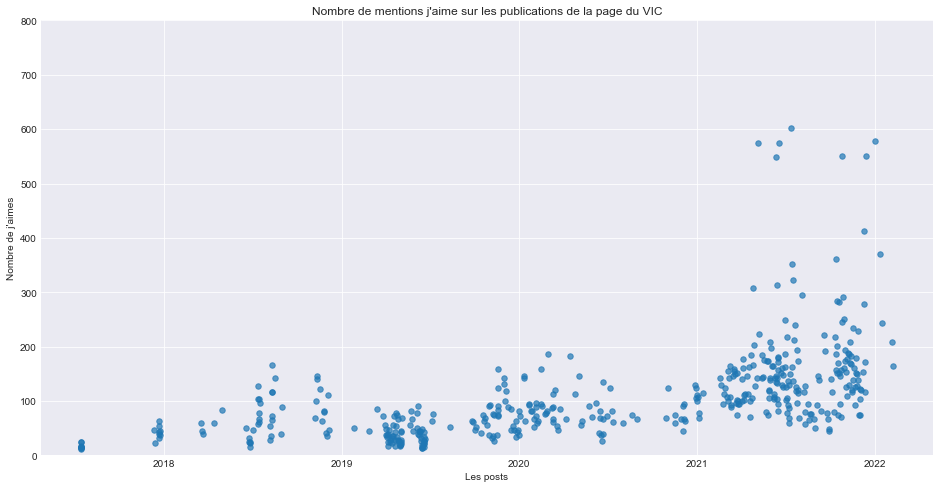

In [41]:
plt.figure(figsize=(16,8))
plt.scatter(posts_df['upload_date'], posts_df['likes'], s = 30, alpha=0.7)
plt.xlabel("Les posts")
plt.ylabel("Nombre de j'aimes")
plt.title("Nombre de mentions j'aime sur les publications de la page du VIC")
plt.ylim([0,800])

plt.show()

On va essayer de former une tendance du nombre de mentions j'aime sur les posts publiés avec le package statsmodels et une fonction d'approximation 

In [58]:
import statsmodels.api as sm

In [52]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

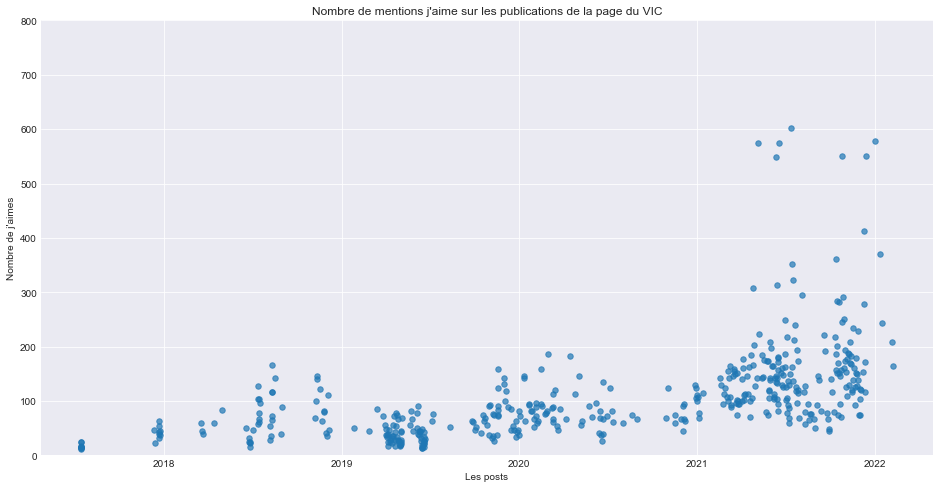

In [57]:
plt.figure(figsize=(16,8))
plt.scatter(posts_df['upload_date'], posts_df['likes'], s = 30, alpha=0.7)
plt.xlabel("Les posts")
plt.ylabel("Nombre de j'aimes")
plt.title("Nombre de mentions j'aime sur les publications de la page du VIC")
plt.ylim([0,800])

plt.show()